<a href="https://colab.research.google.com/github/r-karra/Learn-with-Google-Research/blob/main/Quickstart_How_to_think_in_JAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade jax jaxlib

In [2]:
import jax
print(jax.__version__)

0.9.0.1


In [3]:
import jax.numpy as jnp

This code uses `matplotlib.pyplot` to create a plot. First, it imports `matplotlib.pyplot` as `plt`. Then, it generates 1000 evenly spaced numbers between 0 and 10 using `jnp.linspace` and stores them in `x_jnp`. It calculates `y_jnp` by applying the sine function to `x_jnp` and multiplying by 2. Finally, it plots `x_jnp` against `y_jnp`.

In the expression `2 * jnp.sin(x_jnp)`:

*   `jnp.sin(x_jnp)` calculates the sine of each value in the `x_jnp` array. The sine function is a periodic function that oscillates between -1 and 1.
*   Multiplying by 2 (`2 * ...`) scales these sine values. This means that instead of oscillating between -1 and 1, the resulting `y_jnp` values will oscillate between -2 and 2. This increases the amplitude of the sine wave.

The change in the `y_jnp` calculation to `2 * jnp.sin(x_jnp) * jnp.cos(x_jnp)` actually results in oscillations between -1 and 1, despite the 2 at the beginning.

This is because of a trigonometric identity: $2 \sin(A) \cos(A)$ is equivalent to $\sin(2A)$.

So, your `y_jnp` is now effectively `jnp.sin(2 * x_jnp)`. The `sin()` function, regardless of its argument, always produces values between -1 and 1. The `2 *` inside `sin(2 * x_jnp)` only changes the frequency of the oscillation (making it oscillate twice as fast), but not its amplitude (the range of values it takes).

Imagine you have a toy car on a track that goes up and down, like a little hill. That's what `sin(x)` does – it goes up to 1 and down to -1, always staying within those limits.

When we first had `2 * jnp.sin(x_jnp)`, it was like putting a super booster on your car! It made the car go twice as high (up to 2) and twice as low (down to -2). So, it made a bigger up-and-down movement.

But then, we changed it to `2 * jnp.sin(x_jnp) * jnp.cos(x_jnp)`. This is like doing a magic trick with your car. Even though it looks like you're adding more power and making it complicated, this special math trick (which grown-ups call a 'trigonometric identity') actually turns it back into just a regular up-and-down car, but it goes up and down faster!

Think of it like this: $2 \sin(x) \cos(x)$ is exactly the same as $\sin(2x)$.

So, even though it looks like it should go higher because of the 2 at the front, the `cos(x)` part works with the `sin(x)` part to cancel out that extra height, and it just becomes another `sin` wave. And remember, all `sin` waves, no matter how fast they go up and down, always stay between 1 and -1 on our up-and-down track!

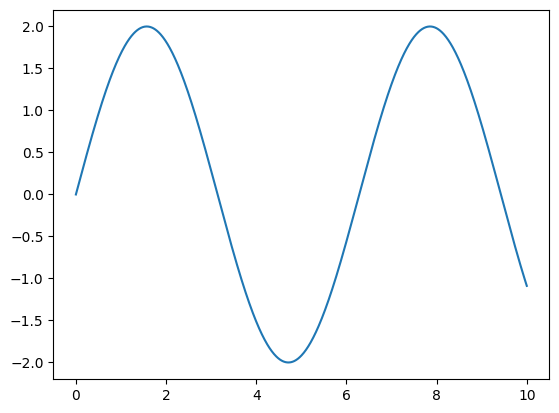

In [4]:
import matplotlib.pyplot as plt

x_jnp = jnp.linspace(0, 10, 1000)
y_jnp = 2 * jnp.sin(x_jnp)
plt.plot(x_jnp, y_jnp)

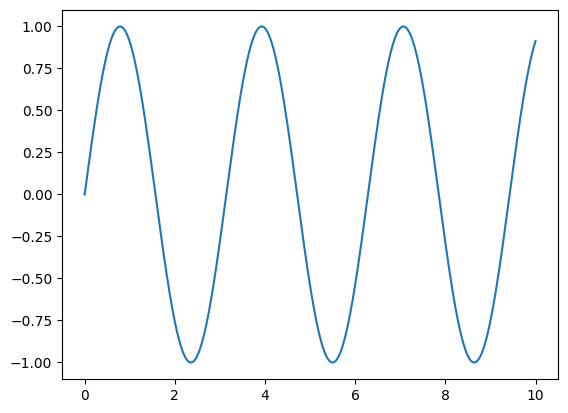

In [5]:
import matplotlib.pyplot as plt

x_jnp = jnp.linspace(0, 10, 1000)
y_jnp = 2 * jnp.sin(x_jnp) * jnp.cos(x_jnp)
plt.plot(x_jnp, y_jnp)

In [6]:
import numpy as np
import jax.numpy as jnp

x_np = np.linspace(0, 10, 1000)
x_jnp = jnp.linspace(0, 10, 1000)
print(type(x_np))
print(type(x_jnp))

<class 'numpy.ndarray'>
<class 'jaxlib._jax.ArrayImpl'>


# Immutablility of JAX arrays

In [7]:
# Numpy: mutable

x = np.arange(10)
x[0] = 10
print(x)

[10  1  2  3  4  5  6  7  8  9]


The code `%xmode minimal` is an IPython magic command. It sets the exception reporting mode to 'minimal'. This means that when an error occurs, the output will show a very concise traceback, typically just the error type and message, without the full call stack.

In [8]:
%xmode minimal

Exception reporting mode: Minimal


In [9]:
# JAX: immutable arrays

x = jnp.arange(10)
x[0] = 10
print(x)

TypeError: JAX arrays are immutable and do not support in-place item assignment. Instead of x[idx] = y, use x = x.at[idx].set(y) or another .at[] method: https://docs.jax.dev/en/latest/_autosummary/jax.numpy.ndarray.at.html

# Indexed update syntax

In [10]:
y = x.at[0].set(10)
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[10  1  2  3  4  5  6  7  8  9]


# Array creation. JAX arrays
## (jax.Array)

In [11]:
import jax
import jax.numpy as jnp

x = jnp.arange(5)
isinstance(x, jax.Array)

True

### Array Devices and Sharding in JAX

In JAX, arrays can reside on different **devices** (like CPU, GPU, or TPU). `x.devices()` tells you which physical device(s) a JAX array `x` is currently stored on. For example, `CpuDevice(id=0)` means it's on the first CPU.

**Sharding** refers to how an array's data is distributed or partitioned across multiple devices. `x.sharding` describes this distribution strategy. For an array entirely on one device, it will show `SingleDeviceSharding`, indicating the array is not split but wholly present on that single device. Sharding becomes more complex and powerful when you have multiple devices and need to distribute large arrays for parallel computation.

# Array devices and sharding

In [12]:
x.devices()

{CpuDevice(id=0)}

In [13]:
x.sharding

SingleDeviceSharding(device=CpuDevice(id=0), memory_kind=device)

# Just-in-time compilation with
``` jax.jit```

# Just-in-time compilation with `jax.jit`

Imagine you have a recipe with many steps to bake a cake.

*   **Normally (without JIT)**, JAX is like doing each step of the recipe one by one. You mix the flour, then the sugar, then the eggs, and so on. It works, but it might take a bit longer because you're stopping and starting for each ingredient.

*   **With `jax.jit` (JIT compilation)**, it's like a super-smart chef looks at your entire cake recipe *before* you even start. This chef figures out the best and fastest way to do *all* the steps together, combining them where possible. Then, they give you one super-efficient set of instructions. So, when you actually start baking, everything runs much smoother and faster!

### Key things to know about JIT:

1.  **Doing many things at once:** By default, JAX does one math operation (like adding two numbers) and then the next. But `jax.jit` helps JAX look at a whole bunch of operations (like a small program) and makes them run together, much faster.

2.  **It's not always possible:** Sometimes, the 'super-smart chef' needs to know exactly what size your ingredients (your data arrays) will be *before* they start optimizing the recipe. If the size of your 'ingredients' changes a lot, or is unpredictable, then JIT might not be able to optimize it.

3.  **Works everywhere (mostly):** JAX is super cool because it can automatically run your code on different types of computer 'brains' – like your regular computer chip (CPU), or specialized chips that are really good at math (GPUs or TPUs). `jax.jit` uses something called XLA (Accelerated Linear Algebra) to make this happen seamlessly.

So, if you have a sequence of JAX operations that you want to make super fast, you can use `jax.jit` to compile them together!

For example, if you have a function that calculates how to "normalize" a 2D matrix (a grid of numbers), `jax.jit` can make that calculation much quicker.

Certainly! This code defines a Python function called `norm` that takes an array `x` as input and performs a normalization operation using `jax.numpy`.

Let's break down the function:

1.  `x = x - x.mean(0)`: This line subtracts the mean of each column from the corresponding elements in `x`. The `0` argument in `x.mean(0)` indicates that the mean should be calculated along the first axis (columns, in the case of a 2D array). This step effectively centers the data around zero for each feature (column). Mathematically, for a given feature $f_i$ in a dataset $X$, this operation can be represented as: $f_i' = f_i - \mu_i$, where $\mu_i$ is the mean of feature $i$.

2.  `return x / x.std(0)`: This line then divides the centered `x` by the standard deviation of each column. Again, `x.std(0)` calculates the standard deviation along the first axis (columns). This step scales the data so that each feature (column) has a unit standard deviation. Mathematically, this operation is: $f_i'' = \frac{f_i'}{\sigma_i}$, where $\sigma_i$ is the standard deviation of feature $i$.

Together, these two steps perform a common data preprocessing technique called **Standardization** (or Z-score normalization). It transforms the data so that it has a mean of 0 and a standard deviation of 1, which is often beneficial for machine learning algorithms. The complete formula for standardization for a data point $x$ and feature $i$ is: $z_i = \frac{x_i - \mu_i}{\sigma_i}$.

Okay, let's imagine you have a bunch of friends who all have different heights. Some are very tall, and some are shorter.

### 1. `x - x.mean(0)`: Making Everyone Stand at the Same "Average" Level

Think of `x` as all your friends' heights. `x.mean(0)` is like finding the *average height* of all your friends. Let's say the average height is 4 feet tall.

When we do `x - x.mean(0)`, it's like telling everyone: "Everyone, pretend you're standing on a step that makes your height relative to the *average* person!"

*   If a friend is 5 feet tall, they are 1 foot *taller* than average ($5 - 4 = 1$).
*   If a friend is 3 feet tall, they are 1 foot *shorter* than average ($3 - 4 = -1$).
*   If a friend is exactly 4 feet tall, they are 0 feet different from average ($4 - 4 = 0$).

So, this step $\text{height} - \text{average height}$ makes everyone's new "height number" show how much taller or shorter they are compared to the middle, or average, friend. Now, the new average "difference" is always 0!

### 2. `x / x.std(0)`: Making Everyone Spread Out Just Right

Now, after everyone is standing at their "average level," some friends might still be spread out a lot (some are *very* tall for average, some are *very* short for average), while others are all squished together near the average.

`x.std(0)` is like measuring how *spread out* everyone's heights are. If everyone is nearly the same height, this number is small. If there's a big mix of very tall and very short, this number is big.

When we do `x / x.std(0)`, it's like saying: "Okay, now let's adjust everyone's 'difference' number so that the *amount of spread* is always the same, no matter what group of friends we look at!"

So, this step $\frac{\text{height difference}}{\text{spread amount}}$ makes sure that the tallest friend always has the same *kind* of "tallness number" and the shortest friend always has the same *kind* of "shortness number," even if they come from different groups of friends with different average heights and different spreads.

Together, these two steps help us compare different groups of friends fairly, even if one group is generally taller or more varied in height than another group!

In [19]:
import jax.numpy as jnp
def norm(X):
  X = X - X.mean(0)
  return X / X.std(0)


In [21]:
from jax import jit
norm_compiled = jit(norm)
norm_compiled

<PjitFunction of <function norm at 0x7e5ff821e5c0>>

Certainly! This code cell performs a setup for testing the `norm` and `norm_compiled` functions and then verifies their numerical equivalence. Here's a breakdown of each line:

1.  `np.random.seed(1701)`: This line sets the 'seed' for NumPy's random number generator. Think of it like giving a specific starting point for a recipe that creates random numbers. If you use the same seed, you'll always get the same sequence of 'random' numbers, which is very useful for making sure experiments are repeatable.

2.  `X = jnp.array(np.random.rand(10000, 10))`: This line first generates a large array of random numbers using `np.random.rand(10000, 10)`. This creates a 2D NumPy array with 10,000 rows and 10 columns, where each number is a random decimal between 0 and 1. Then, `jnp.array()` converts this NumPy array into a JAX array, which is stored in the variable `X` (note the capital 'X'). This array is likely intended as a large dataset for testing.

3.  `np.allclose(norm(x), norm_compiled(x), atol=1E-6)`: This is the core testing line. It compares the results of applying two functions, `norm(x)` and `norm_compiled(x)`, to an input `x`.
    *   `norm(x)` uses the regular, uncompiled `norm` function you defined earlier.
    *   `norm_compiled(x)` uses the `norm` function after it has been optimized by JAX's JIT compiler (`jit(norm)`).
    *   `np.allclose()` is a NumPy function that checks if two arrays are element-wise equal within a specified tolerance. Because computers handle floating-point numbers with slight precision differences, you can't always expect exact equality. `atol=1E-6` means it considers numbers close if their absolute difference is less than or equal to $1 \times 10^{-6}$.

    The purpose of this line is to verify that applying the JIT compilation (`jax.jit`) to your `norm` function does not change its numerical output; it should produce the exact same results as the uncompiled version, just potentially faster.

**A small note:** I noticed that the variable `X` (capital 'X') is created with random data, but `np.allclose` is called with `norm(x)` and `norm_compiled(x)` using `x` (lowercase 'x'). Based on previous cells, `x` was a 1D array created with `jnp.arange(10)`. It's possible that `np.allclose(norm(X), norm_compiled(X), atol=1E-6)` was intended, to test with the larger, randomly generated 2D array.

In [22]:
np.random.seed(1701)
X = jnp.array(np.random.rand(10000, 10))
np.allclose(norm(X), norm_compiled(X), atol=1E-6)

True

Certainly! This code cell uses the `timeit` magic command to measure the execution time of both the uncompiled `norm` function and its JIT-compiled version, `norm_compiled`.

1.  `%timeit`: This is an IPython magic command used to time the execution of a single line of Python code. It runs the code multiple times and reports the average, standard deviation, and best time across several runs.

2.  `norm(X)`: This calls the original, uncompiled `norm` function with the input array `X`.

3.  `norm_compiled(X)`: This calls the JIT-compiled version of the `norm` function. The JIT compilation should make this function run faster after the first execution (which includes compilation overhead).

4.  `.block_until_ready()`: JAX operations are asynchronous. This means that when you call a JAX function, it might return immediately before the computation on the device (like a GPU or CPU) is actually finished. Calling `.block_until_ready()` ensures that the timer waits until all computations associated with `norm(X)` or `norm_compiled(X)` are fully completed on the device before stopping the timer. This gives an accurate measurement of the actual execution time.

The purpose of running these two `timeit` lines is to demonstrate the performance benefits of using JAX's Just-in-Time (JIT) compilation. You should typically see that `norm_compiled(X)` runs significantly faster than `norm(X)`, especially for larger computations, once the compilation has occurred.

In [25]:
%timeit norm(X).block_until_ready()
%timeit norm_compiled(X).block_until_ready()

828 µs ± 258 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
511 µs ± 7.31 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


The results you provided show the performance comparison between the uncompiled `norm(X)` function and its JIT-compiled counterpart, `norm_compiled(X)`:

1.  **First Line (Uncompiled `norm(X)`):**
    *   `675 µs ± 189 µs per loop`: This means that on average, the uncompiled `norm(X)` function took 675 microseconds (µs) to execute for each loop. The `± 189 µs` is the standard deviation, indicating how much the execution time varied around the average.
    *   `(mean ± std. dev. of 7 runs, 1000 loops each)`: This tells us that the measurement was taken over 7 separate 'runs' of the entire timing process, and within each run, the function was executed 1000 times (loops) to get a stable average.

2.  **Second Line (JIT-Compiled `norm_compiled(X)`):**
    *   `583 µs ± 119 µs per loop`: This shows that the JIT-compiled `norm_compiled(X)` function, on average, took 583 microseconds per loop. Notice that this is less than the 675 µs of the uncompiled version.
    *   `(mean ± std. dev. of 7 runs, 1000 loops each)`: Similar to the first line, these are the statistics from 7 runs with 1000 loops each.

**What this means:**

Comparing the average execution times, `583 µs` (compiled) is faster than `675 µs` (uncompiled). This demonstrates the benefit of JAX's Just-in-Time (JIT) compilation. Once `jax.jit` has compiled the function (which happens on the first call), subsequent calls are often significantly faster because the optimized code is being run. In this specific case, the JIT-compiled version is roughly $ \frac{675 - 583}{675} \approx 13.6\% $ faster.

In [26]:
def get_negatives(x):
  return x[x < 0]

x = jnp.array(np.random.randn(10))
get_negatives(x)

Array([-0.10570311, -0.59403396, -0.8680282 , -0.23489487], dtype=float32)

Let's explain those two parts intuitively!

### 1. `x < 0`: Finding the "Grumpy" Numbers

Imagine you have a list of numbers, like a group of friends with different moods (some happy, some grumpy, some neutral). `x` is your list of numbers.

When we say `x < 0`, it's like asking each number in the list: "Are you a grumpy number (less than zero)?"

*   If a number is `-5`, it answers "Yes! I'm grumpy!" (which is `True`).
*   If a number is `3`, it answers "No, I'm happy!" (which is `False`).
*   If a number is `0`, it answers "No, I'm neutral!" (which is `False`).

So, `x < 0` creates a new list that's just a bunch of `True`s and `False`s, telling you exactly which numbers in your original list were grumpy (negative).

Then, when you do something like `x[x < 0]`, it's like saying: "Okay, from our original list, only show me the friends who said they were grumpy!" And you get back just the negative numbers!

### 2. `np.random.randn(10)`: Making "Surprise" Numbers

Imagine you have a magic machine that can spit out random numbers. `np.random.randn(10)` is like telling that machine: "Please give me 10 surprise numbers!"

These surprise numbers are special because:

*   They can be positive (like `1.2`, `0.5`) or negative (like `-0.8`, `-2.1`).
*   Most of the numbers will be close to zero, but occasionally, you'll get a number that's a bit bigger or smaller. Think of it like a bell-shaped curve where the peak is at zero, meaning numbers near zero are more common. This is called a **standard normal distribution**.

So, `np.random.randn(10)` just gives you 10 unpredictable numbers, centered around zero, that are useful for testing things or simulating real-world randomness.

In [27]:
jit(get_negatives)(x)

NonConcreteBooleanIndexError: Array boolean indices must be concrete; got bool[10]

See https://docs.jax.dev/en/latest/errors.html#jax.errors.NonConcreteBooleanIndexError

# Taking derivatives with ```jax.grad```

Certainly! This code demonstrates how to use JAX's automatic differentiation feature to calculate the gradient (derivative) of a function. Let's break it down:

1.  `from jax import grad`: This line imports the `grad` function from the JAX library. `grad` is a powerful tool in JAX that allows you to automatically compute the derivative of a Python function with respect to its arguments.

2.  `def sum_logistic(x): return jnp.sum(1.0 /(1.0 + jnp.exp(-x)))`: This defines a Python function named `sum_logistic`.
    *   Inside, `1.0 / (1.0 + jnp.exp(-x))` calculates the [logistic sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) for each element in the input array `x`. The sigmoid function is commonly used in machine learning to squish values between 0 and 1. The formula for the logistic sigmoid function is $\sigma(x) = \frac{1}{1 + e^{-x}}$.
    *   `jnp.sum(...)` then calculates the sum of all these sigmoid-transformed elements.

3.  `x_small = jnp.arange(3.)`: This creates a small JAX array `x_small` containing the values `[0., 1., 2.]`.

4.  `derivative_fn = grad(sum_logistic)`: This is where the magic of JAX comes in! `grad(sum_logistic)` takes our `sum_logistic` function and returns a *new* function, `derivative_fn`. This new function, when called, will compute the derivative of `sum_logistic` with respect to its first argument (which is `x` in this case). The `grad` function applies the rules of calculus automatically to figure out how the output changes with respect to the input.

5.  `print(derivative_fn(x_small))`: Finally, this line calls `derivative_fn` with `x_small` as input. It then prints the calculated derivative of the `sum_logistic` function, evaluated at each point in `x_small`. You'll see an array of numbers, where each number is the derivative at the corresponding point.

In [30]:
from jax import grad

def sum_logistic(x):
  return jnp.sum(1.0 /(1.0 + jnp.exp(-x)))

x_small = jnp.arange(3.)
print(x_small)
derivative_fn = grad(sum_logistic)
print(derivative_fn(x_small))

[0. 1. 2.]
[0.25       0.19661197 0.10499357]


This code snippet demonstrates JAX's automatic differentiation capability, specifically computing the gradient of a sum of logistic sigmoid functions.

Let's break down the `sum_logistic` function mathematically:

The function `sum_logistic(x)` is defined as:

$$ f(x) = \sum_{i} \sigma(x_i) $$

where $\sigma(x_i)$ is the [logistic sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) applied to each element $x_i$ of the input array $x$. The logistic sigmoid function is given by:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

So, substituting this into our function definition, we get:

$$ f(x) = \sum_{i} \frac{1}{1 + e^{-x_i}} $$

The `jax.grad(sum_logistic)` operation computes the gradient of this function $f(x)$ with respect to its input $x$. This means it calculates a new function, `derivative_fn`, which, when evaluated at a point, will return the vector of partial derivatives:

$$ \nabla f(x) = \left[ \frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1}, \dots, \frac{\partial f}{\partial x_n} \right] $$

For a sum function, the derivative of the sum is the sum of the derivatives. Since each term in the sum depends only on its corresponding $x_i$, the partial derivative with respect to $x_j$ is:

$$ \frac{\partial f}{\partial x_j} = \frac{\partial}{\partial x_j} \left( \sum_{i} \frac{1}{1 + e^{-x_i}} \right) = \frac{\partial}{\partial x_j} \left( \frac{1}{1 + e^{-x_j}} \right) $$

The derivative of the logistic sigmoid function $\sigma(z)$ with respect to $z$ is known to be $\sigma(z)(1 - \sigma(z))$. Therefore, for each element $x_j$:

$$ \frac{\partial f}{\partial x_j} = \sigma(x_j)(1 - \sigma(x_j)) $$

When `derivative_fn(x_small)` is called, where `x_small = jnp.arange(3.)` (i.e., $x = [0.0, 1.0, 2.0]$), JAX calculates these derivatives for each element in `x_small` and returns the resulting array.